# Belastingen uit matroos

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_noos_matroos_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    LoadsMatroos:
        website: "noos" 
        model: "observed"
        parameters: ["waterlevel"]

DataAdapter: 
    default_options:
        csv:
            sep: ","

    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_config.yaml")
c.lees_config()

c:\Data\Python\TBCI\toolbox-continu-inzicht\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Zet de data adapter klaar en geef deze de configuratie mee 

In [2]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [3]:
from toolbox_continu_inzicht.loads import LoadsMatroos

matroos_obs = LoadsMatroos(data_adapter=data)

In [4]:
matroos_obs.df_in

In [6]:
from toolbox_continu_inzicht.utils.fetch_functions import fetch_data_get

import geopandas as gpd

In [10]:
source = None
parameter = None
"""Haal alle matroos locaties op, indien gewenst ook bron en parameter."""
url = "https://noos.matroos.rws.nl/direct/get_available.php?dd_endpoint=locations&"

params = {"format": "dd_default_2.0.0", "geojson": 1}
if source is not None:
    params["source"] = source
if parameter is not None:
    params["unit"] = parameter

status, geojson_data = fetch_data_get(
    url=url, params=params, mime_type="json", timeout=30
)

if status is None and geojson_data is not None:
    if "features" in geojson_data:
        gdf = gpd.GeoDataFrame.from_features(geojson_data)
        gdf = gdf.drop(columns=["url", "node"])
        gdf = gdf.rename(
            columns={
                "locationName": "measurement_location_code",
                "locationId": "measurement_location_id",
            }
        )

    else:
        raise ConnectionError(f"No results in data, only:{geojson_data.keys()}")
else:
    raise ConnectionError("Connection failed:", status)

ConnectionError: [Errno Connection failed:] The read operation timed out

In [5]:
ds = matroos_obs.run(input="BelastingLocaties", output="Waterstanden")

KeyError: 'geometry'

In [7]:
df = matroos_obs.df_out

In [8]:
df

,measurement_location_id,measurement_location_code,measurement_location_description,parameter_id,parameter_code,date_time,unit,value,value_type
0,4,denhelder,Den Helder,4724,WATHTE,2024-11-12 10:00:00+00:00,cm,-85.0,meting
1,4,denhelder,Den Helder,4724,WATHTE,2024-11-12 10:10:00+00:00,cm,-83.0,meting
2,4,denhelder,Den Helder,4724,WATHTE,2024-11-12 10:20:00+00:00,cm,-80.0,meting
3,4,denhelder,Den Helder,4724,WATHTE,2024-11-12 10:30:00+00:00,cm,-73.0,meting
4,4,denhelder,Den Helder,4724,WATHTE,2024-11-12 10:40:00+00:00,cm,-66.0,meting
...,...,...,...,...,...,...,...,...,...
571,3,vlissingen,Vlissingen,4724,WATHTE,2024-11-13 09:10:00+00:00,cm,67.0,meting
572,3,vlissingen,Vlissingen,4724,WATHTE,2024-11-13 09:20:00+00:00,cm,89.0,meting
573,3,vlissingen,Vlissingen,4724,WATHTE,2024-11-13 09:30:00+00:00,cm,112.0,meting
574,3,vlissingen,Vlissingen,4724,WATHTE,2024-11-13 09:40:00+00:00,cm,134.0,meting


In [9]:
df_plot = df[df["measurement_location_description"] == "Hoek van Holland"]

In [10]:
import numpy as np  # type: ignore

values_nan = df_plot[df_plot["value"] == -999].index
for val in values_nan:
    df_plot.loc[val, "value"] = np.nan
df_plot = df_plot.set_index("date_time")

<Axes: xlabel='date_time'>

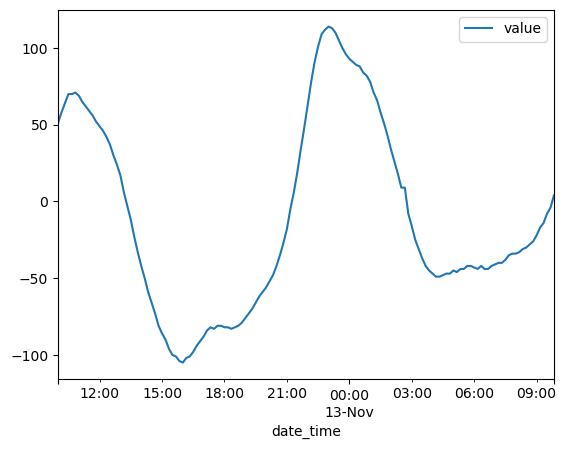

In [11]:
df_plot[["value"]].plot()

### Dit waren alleen metingen, herhaal nu met dataset met ook voorspellingen

Dit leest een configuratie bestand `belasting_noos_matroos_config_fcst.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48] 

    LoadsMatroos:
        website: "noos"
        model: "dcsm6_kf"
        parameters: ["waterlevel"]

DataAdapter: 
    default_options:
        csv:
            sep: ","

    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [12]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = LoadsMatroos(data_adapter=data)

In [13]:
matroos_fsct.run(input="BelastingLocaties", output="Waterstanden")

In [14]:
df_fcst = matroos_fsct.df_out
df_plot_fcst = df_fcst[
    df_fcst["measurement_location_description"] == "Hoek van Holland"
]
values_nan = df_plot_fcst[df_plot_fcst["value"] == 999].index
for val in values_nan:
    df_plot_fcst.loc[val, "value"] = np.nan
df_plot_fcst = df_plot_fcst.set_index("date_time")

<Axes: xlabel='date_time'>

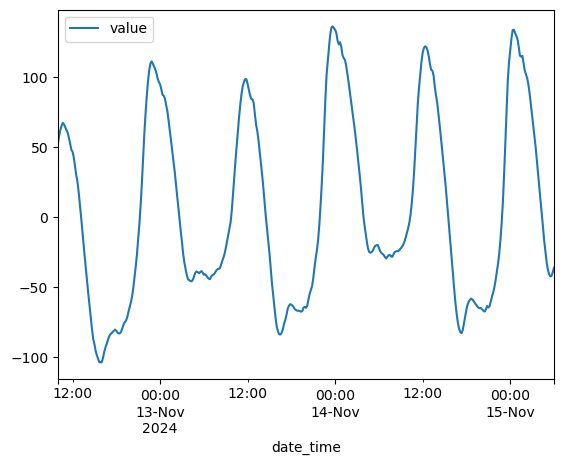

In [15]:
df_plot_fcst[["value"]].plot()

##### vergelijk de twee 

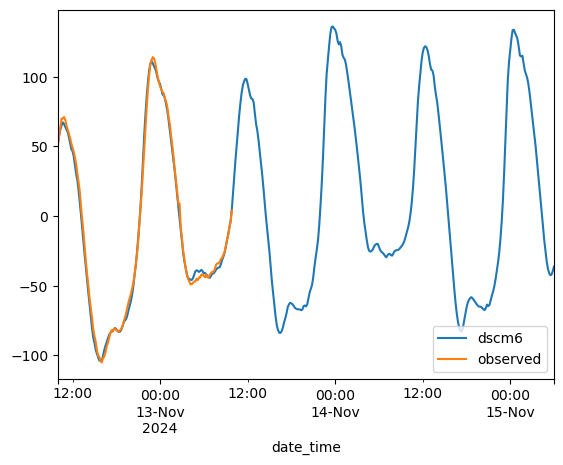

In [16]:
ax = df_plot_fcst[["value"]].plot()
df_plot[["value"]].plot(ax=ax)
ax.legend(["dscm6", "observed"]);

#### werkt ook met vitaal.matroos.rws
werkt alleen als je in de `.env` username & password mee geeft
```yaml
vitaal_user: "..."
vitaal_password: "..."
```

en de website aanpassen

```yaml
LoadsMatroos:
        website: "vitaal" 


```

In [17]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_vitaal_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

vitaal_fsct = LoadsMatroos(data_adapter=data)

In [18]:
vitaal_fsct.run(input="BelastingLocaties", output="Waterstanden")

In [19]:
df_vitaal_fcst = vitaal_fsct.df_out
df_plot_vitaal = df_vitaal_fcst[
    df_vitaal_fcst["measurement_location_description"] == "Hoek van Holland"
]
values_nan = df_plot_vitaal[df_plot_vitaal["value"] == 999].index
for val in values_nan:
    df_plot_vitaal.loc[val, "value"] = np.nan
df_plot_vitaal = df_plot_vitaal.set_index("date_time")

in dit geval indentiek:

<Axes: xlabel='date_time'>

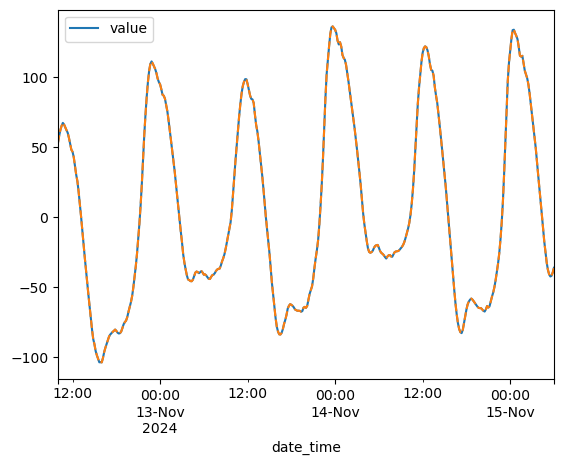

In [20]:
ax = df_plot_fcst[["value"]].plot()
df_plot_vitaal["value"].plot(ls="--", ax=ax)

In [21]:
from toolbox_continu_inzicht.loads import get_matroos_locations

In [22]:
gdf = get_matroos_locations(parameter="waterlevel", source="dcsm6_kf")

In [23]:
gdf

,geometry,measurement_location_id,measurement_location_code
0,POINT Z (3.81011 55.39894 0),511,A121
1,POINT Z (-2.07333 57.14333 0),38,Aberdeen
2,POINT Z (0.78556 57.26056 0),111,anasuria
3,POINT Z (3.29 51.36278 0),2160,appelzak
4,POINT Z (2.06556 56.39972 0),48,Aukfield platform
...,...,...,...
176,POINT Z (6.65388 53.56998 0),1879,Eemsboei 17
177,POINT Z (6.79509 53.50673 0),1880,Eemsboei 27
178,POINT Z (6.83702 53.48027 0),1881,Eemsboei 30
179,POINT Z (7.00684 53.32695 0),1882,Eemsboei 51


In [24]:
from toolbox_continu_inzicht.loads.loads_matroos.get_matroos_locations import (
    get_matroos_models,
)

In [25]:
df = get_matroos_models()

In [26]:
df[["source_label"]]

,source_label
0,bma2_05
1,bma2_25
2,bma2_50
3,bma2_75
4,bma2_95
...,...
178,wdij_wind
179,wind_dsc_wdij
180,zeedelta_v1
181,swan_zuno
